# 알고리즘 (Model)

- 최적화 (Optimization) : 문제 상황에서 여러 해결방안 중 최적의 해결 방안을 찾는 것
- 기본적으로 머신러닝에서 데이터로부터 학습을 통해 수식화를 진행할 때, 목표값(Y)을 잘 예측하는 수식을 만드는 과정 / 여러개의 수식 중, 해당 데이터에 가장 적절한 수식을 찾는 것 -> 최적화

- 수학적 접근 : 특정 함수 값을 최소화(최대화)하는 최적의 수식(회귀 계수, Weight, 가중치)
  - 최소화 Minimization : 함수의 목표변수 Y값이 최소가 되게끔 Parameter를 찾는 문제
    - Y : 오류 / 오차 / 비용(Cost) / 손실 / ...
  - 최대화 Maximization : 함수의 목표변수 Y값이 최대가 되게끔 Parameter를 찾는 문제
    - Y : 이윤 / 점수 / 성능 / ...

- 데이터 마이닝에 적용하여 사용 : 지도학습에서 Model을 구축할 때, **데이터 상의 실제값과 Model이 예측한 예측값의 차이(오차 Error, Residaul)**가 최소가 되는 방향으로 모델을 구성
- 최적화 기법의 종류 :
  - Least Square Method (최소 제곱법 - 회귀분석에서의 최적화)
  - Gradient Descent Method (경사 하강법 - 회귀분석에서의 최적화)
  - Newton's Method
  - Gauss Newton's Method
  - Markov Batesian Method

# 최소 제곱법 (Least Square Method)

- 회귀분석에서 사용되는 최적화 기법 (신경망 알고리즘 최적화 기법)
- 데이터를 대표하는 회귀선을 찾을 때, 회귀선이 예측한 예측값과 실제 데이터 값의 차이(오차/잔차)의 제곱의 합이 최소화가 되는 방향으로 Parameter를 찾는 방법 (제곱을 하는 이유 : 회귀선이 맞지 않더라도 양,음의 방향으로 똑같이 떨어진 잔차가 있으면 합은 0이되므로 올바른 회귀선이라고 착각할수 있으므로 제곱을해야함)
![img](https://raw.githubusercontent.com/Claudiooo/DeepLearningLearning/Group2/Images/linear_regression_error1.png)


- 대수적 기법 : 오차항이 최소가 되는 지점의 m,b(회귀 계수)를 찾기 위해 m과 b에 대한 편미분을 실시하여, 오차항의 최소가 되는 지점을 연립방정식을 통해 찾는 방식
  ![img](https://spin.atomicobject.com/wp-content/uploads/linear_regression_gradient1.png)

- 해석학적 기법 : 오차항을 행렬형태로 표현하여 유사역행렬 (Pesudo Invers Matrix)을 이용해 회귀 계수 계산

# 경사하강법 (Gradient Descent)

- 점진적인 반복 계산을 통해 함수가 최소가 되는 파라미터를 찾는 모든 기법
  - Gradient : 함수가 증가하는/감소하는 방향과 크기를 표현
  - 오차(실제값과 예측값의 차이)가 최소가 되는 방향으로 (Gradient) 점진적으로 계산 (Descent)
 
  - Weight(회귀 계수) 값을 임의로 지정한 다음 비용함수(Cost Function, 오차항 (y-y')²)를 계산
  - 오차항의 차이가 있는 경우, Weight(회귀 계수) 값을 Update, 다시 비용함수를 계산
  - 비용함수가 감소했다면, 2번 절차를 반복하며, 비용함수가 바뀌지 않는 지점까지 반복해서 계산

- **확률적 경사 하강법 (Stochastic Gradient Descent)**
- 경사하강법은 모든 데이터에 대해 반복적으로 비용함수(Cost Function)을 계산하기 때문에, 시간이 오래걸림
- 전체 데이터가 아닌, 일부분의 데이터를 Random Sampling하여 Weight에 대한 Update (학습 시간 단축)
- Betch : Random하게 Sampling 할 데이터를 추출

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import plotly.express as px

In [4]:
df1 = pd.read_csv(r'C:\Users\UserK\Desktop\Ranee\data\ML\12_Data.csv')

In [5]:
col_list = [x for x in df1.columns if 'Mean' in x][1:]
# Mean 글자가 포함된 column명을 호출 하되,
# 맨 첫번째 (0번째) Mean Radius는 제외하고 리스트를 구성
# Mean Radius는 Y로 사용

In [6]:
Y = df1['Mean Radius']
X = df1[col_list]

In [8]:
from sklearn.model_selection import train_test_split # 학습데이터와 검증데이터 분할
from sklearn.pipeline import make_pipeline # 특성공학 + 학습
from sklearn.preprocessing import StandardScaler # 스케일링 기법 사용 (평균0, 표준편차1)
from sklearn.linear_model import LinearRegression # 최소제곱법 + 경사하강법 (회귀분석)
from sklearn.model_selection import GridSearchCV # 교차검증 + 하이파라미터 튜닝

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=1234)

In [10]:
# 스케일링 + 학습 파이프라인 구성
model_pipe = make_pipeline( StandardScaler(), LinearRegression() )

In [13]:
# 교차검증
grid_model = GridSearchCV(model_pipe, param_grid={}, cv=5)
grid_model.fit(X_train, Y_train) # 학습 수행
best_model = grid_model.best_estimator_ # 학습 후 최적성능 모델

In [15]:
best_model['linearregression'].intercept_ # 회귀 모델의 절편을 계산

14.182746478873236

In [18]:
best_model['linearregression'].coef_ # 회귀 모델의 회귀 계수를 계산
df_coef = pd.DataFrame()
df_coef['coef'] = best_model['linearregression'].coef_  # 회귀 모델의 회귀 계수를 계산
df_coef['X'] = X.columns

In [20]:
df_coef.sort_values(by='coef') # 각 X 앞에 곱해진 회귀 계수값을 확인

,coef,X
4,-0.256111,Mean Compactness
1,-0.048943,Mean Area
6,-0.045116,Mean Concave Points
5,-0.029356,Mean Concavity
2,-0.003275,Mean Texture
7,0.012568,Mean Symmetry
3,0.018702,Mean Smoothness
8,0.021864,Mean Fractal Dim
0,3.735834,Mean Perimeter


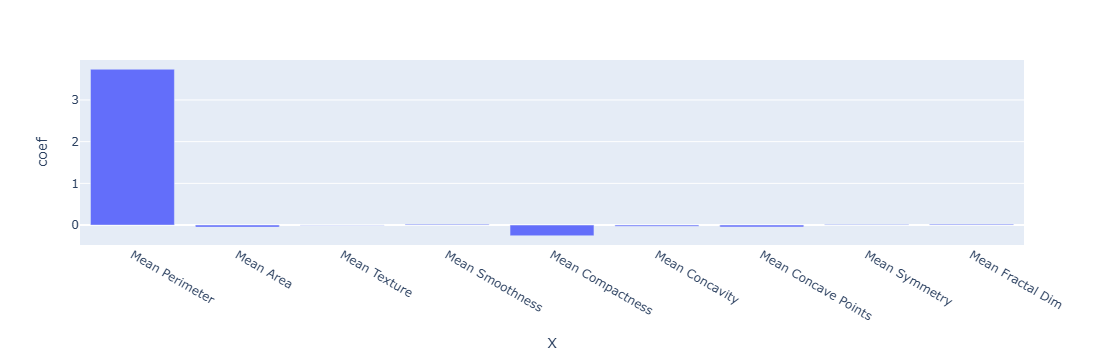

In [21]:
px.bar(df_coef, x='X', y='coef') # 회귀계수의 시각화

In [22]:
# 회귀모델 성능 평가

# R² (결정계수) : 회귀식이 데이터를 얼마나 잘 설명하고 있는가 (0~1)
# MSE (평균 제곱 오차) : 실제 값과 예측값의 차이의 제곱 합의 평균을 계산 (0으로 갈수록 좋은 모델)
# MAE (평균 절대 오차) : 실제 값과 예측값의 절대값의 합의 평균을 계산 (0으로 갈수록 Best)
# RMSE : MSE에 Root 제곱근을 사용하여, 더욱 직관적으로 해석 가능한 평가지표

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [23]:
# 생성한 모델을 예측값을 계산해, 실제값과 예측값의 차이를 연산
Y_train_pred = best_model.predict(X_train)
Y_test_pred = best_model.predict(X_test)

In [25]:
print('학습 결정 계수 : ' , r2_score(Y_train, Y_train_pred))
print('일반화 결정 계수 : ' , r2_score(Y_test, Y_test_pred))

학습 결정 계수 :  0.9994225170133184
일반화 결정 계수 :  0.9991793129574523


In [26]:
print('학습 MSE : ' , mean_squared_error(Y_train, Y_train_pred))
print('일반화 MSE : ' ,  mean_squared_error(Y_test, Y_test_pred))

학습 MSE :  0.007060266987012296
일반화 MSE :  0.010560016874980819


In [27]:
print('학습 MAE : ' , mean_absolute_error(Y_train, Y_train_pred))
print('일반화 MAE : ' ,  mean_absolute_error(Y_test, Y_test_pred))

학습 MAE :  0.05353323700268606
일반화 MAE :  0.06053029968920205


# 다항회귀분석 (Polynominal Regression)

- 기본의 선형 회귀 분석 : X와 Y의 관계식, 수식이 1차식인 형태
- 다항회귀 : 다차원의 X를 2차 또는 3차 방정식 이상으로 표현하여 회귀 분석을 수행
- 학습 시키려 하는 X를 Polynomianl 변환(파이프 내에서 수행)을 통해 학습

In [28]:
from sklearn.preprocessing import PolynomialFeatures

In [31]:
model_pipe = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
model_pipe.fit(X_train, Y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [32]:
model_pipe['linearregression'].coef_ # 해석의 의미가 없어짐

array([ 2.87728834e+06,  1.66753501e-01,  1.23179531e-04,  7.22579783e-02,
       -8.29671369e+00,  3.94535027e-01, -6.13412360e+00,  1.23989629e+01,
        2.80358279e+00,  4.54943729e+01,  2.81248867e-05, -7.81159603e-06,
       -8.56477116e-04,  2.90909202e-01, -1.84474124e-01,  7.39830121e-02,
       -1.57607991e-01, -4.39348711e-02, -2.80782429e-01,  4.14371024e-08,
        4.92069109e-05, -2.03530644e-02,  1.11781338e-02, -5.04592995e-03,
        9.49310322e-03,  4.32387103e-03,  1.79910471e-02, -2.02870702e-04,
       -2.59782281e-01, -7.51283166e-02,  4.47801832e-02,  1.45360113e-01,
        1.20132016e-02,  1.29327912e-02, -7.54110113e+01,  5.70142209e+01,
       -4.65514639e+01,  7.71384783e+01,  4.35217575e+00,  1.49338205e+02,
        1.88560818e+01, -9.16166772e+00, -6.19972326e+00,  7.16946495e+00,
       -4.22832056e+01, -8.61705205e-01,  1.04371882e+01,  8.77713835e+00,
        7.55097942e+01, -1.06659359e+01, -2.74142767e+01, -1.47449928e+02,
        3.81599074e+00, -

# 규제 선형 회귀 (Regularization Regression)

- Overfitting을 방지, 차원의 저주 방지하기 위해 회귀 계수를 적절히 통제하여 회귀식을 구성
- Cost Function + 패널티 항
- Alpah (패널티 항 통제 계수, Hyper Parameter)
  
- Ridge : L2규제 (제곱으로 연산되는 패널티 항을 추가) / 상대적으로 큰 회귀 계수값을 통제하여 (회귀 계수를 특정 값 이상으로 커지지 않게 통제) Overfitting이 발생하지 않도록 규제
  - 높은 Alpha : 모델의 계수를 더 많이 축소하여 복잡성을 줄임 (Overfitting 방지 / 성능 저하)
  - 낮은 Alpah : 정규화 효과를 줄여 (패널티를 줄임) 모델의 계수가 더 늘어나게 통제 (Overfitting 발생 가능성)

- Lasso : L1규제 (절대값으로 연산되는 패널티 항을 추가) / 예측 영향력이 적은 X의 회귀 계수를 0으로 만들어 (영향력없는X를뺀다) 회귀분석에 선택되지 않게 통제 (변수 선택법)
  - 제조/공정에서 X Column이 굉장히 많은 경우 -> 유의미한 X를 선택해 남긴 뒤, 다시 회귀 분석을 수행
  - 높은 Alpha : 모델의 계수를 더 많이 축소, 0으로 변환 (Overfitting 방지 / 단순화 / 성능 저하)
  - 낮은 Alpah : 모델의 복잡성은 증가 / 0으로 삭제되는 Column은 줄임 (Overfitting 발생 가능성)
    
- Elastic : L1 + L2 / 회귀 계수가 큰 인자는 통제, 회귀 계수가 작은 인자는 0으로 만들어 통제

In [33]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [35]:
model_pipe = make_pipeline(StandardScaler(), Lasso())

In [38]:
hyperparameter = {'lasso__alpha' : [0.01,0.1,1,1.5,2]}
grid_model = GridSearchCV(model_pipe, param_grid = hyperparameter, cv=3)
grid_model.fit(X_train, Y_train)
best_model = grid_model.best_estimator_

In [41]:
df_coef_lasso = pd.DataFrame()
df_coef_lasso['coef'] = best_model['lasso'].coef_
df_coef_lasso['X'] = X_train.columns
df_coef_lasso

,coef,X
0,3.559761,Mean Perimeter
1,0.022036,Mean Area
2,-0.000000,Mean Texture
3,0.000000,Mean Smoothness
4,-0.200058,Mean Compactness
5,-0.002659,Mean Concavity
6,-0.000000,Mean Concave Points
7,-0.000000,Mean Symmetry
8,-0.026762,Mean Fractal Dim


In [43]:
model_pipe = make_pipeline(StandardScaler(), Ridge())
hyperparameter = {'ridge__alpha' : [0.01,0.1,1,1.5,2]}
grid_model = GridSearchCV(model_pipe, param_grid = hyperparameter, cv=3)
grid_model.fit(X_train, Y_train)
best_model2 = grid_model.best_estimator_

In [45]:
df_coef_ridge = pd.DataFrame()
df_coef_ridge['coef'] = best_model2['ridge'].coef_
df_coef_ridge['X'] = X_train.columns
df_coef_ridge

,coef,X
0,3.728883,Mean Perimeter
1,-0.043296,Mean Area
2,-0.003280,Mean Texture
3,0.018652,Mean Smoothness
4,-0.254408,Mean Compactness
5,-0.029750,Mean Concavity
6,-0.044667,Mean Concave Points
7,0.012486,Mean Symmetry
8,0.020817,Mean Fractal Dim


# 로지스틱 회귀 분석 (Logistic Regression) 

- Y 범주형 형태인 분류를 수행할 수 있는 회귀 분석 모델 (분류기법)
- 선형회귀 기법 -> 분류 모델
- 원리 :
    ![image.png](attachment:0273fad6-64c3-4cbb-a1e1-7740cbed0511.png)
  - Odds(오즈, 승산) : 임의의 사건이 발생할 확률
  - Odds Ratio (오즈 비율, 승산비) : 임의의 특정 사건이 발생하고, 해당 사건에 성공,실패 여부의 비율을 계산
  - Odds값을 계산한 뒤, log 함수를 취하여 Link Function(연결함수- 특정함수를 다른 형태로 변화하기 위한 함수/ 로짓 함수 (Log odds))의 선형 예측 모델을 로지스틱 변환을 통해 1,0 (A,B)과 같은 분류를 수행   

- 시그모이드 (Sigmoid) 함수 형태로 연결함수를 최적화 -> 시그모이드 함수의 Y를 분류의 확률 값으로 사용하여 분류를 진행
- Logistic Regression 알고리즘의 최적화 기법
  - Newton Conjugate Gradient : 뉴턴공액경사기법 / Log odds 함수의 Cost Function을 최소화 하기 위해 사용되는 최적화 함수
    - 작동 원리 :
      1. 초기 추정값 세팅
      2. 비용함수 Cost Function 도함수 계산 / Hessian Matix 헤이시안 행렬 계산을 수행
      3. Update 방향을 결정 (Newton 함수를 활용해 Update 방향을 결정)
      4. Conjugate Gradient을 이용하여, 새로운 Update 값을 계산
      5. 최적화가 충분히 진행 될 때 까지 (Cost Function이 최소지점을 찾을 때 까지) 위의 과정을 반복
    - 대규모 데이터셋에서는 속도가 느림 / 매우 정교하게 Cost Function을 계산 -> 성능이 비교적 좋다
    - Overfitting 가능성 
  - Limited-memory BFGS (Broyden Flecher Goldfarbs Shanno)
    - 메모리 사용을 최소로 줄이며 연산 최적화 기법 (Logistic Regression 알고리즘의 기본값)
  - Stochastic Average Gradient (SAG) :
    - 확률적 경사하강법을 적용한 최적화 기법 (Betch 통계량을 계산하여 Cost Function 도출)
    - 대규모 데이터셋에 적합하며, 연산속도가 빠르고, 메모리사용량이 적은 최적화 기법
  - Stochastic Average Gradient Descent A.... (SAGA) :
    - SAG기법에 규제항(*모델의 복잡도가 줄어듦으로, 성능도 저하될 가능성이 있다)을 추가하여 학습을 수행
    - 대규모 데이터 셋에 적용 가능, 빠른 연산 -> Overfitting 사전에 방지
  - Lib-linear
    - 소규모 데이터셋의 이진분류에서 빠르고 효울
    - 적인 최적화

In [48]:
df2 = pd.read_csv(r'C:\Users\UserK\Desktop\Ranee\data\ML\15_Data.csv')

In [49]:
Y = df2['수술실패여부']
X = df2[['신장','연령','체중','통증기간(월)','환자통증정도']]

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=1234)

In [51]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

In [52]:
model_pipe = make_pipeline(SimpleImputer(strategy ='median'), LogisticRegression())

- Logistic Regression Hyper Parameter
  - solver : 최적화에 사용할 알고리즘을 선택 'newton-cg' / 'lbfgs' / 'sag' / 'saga'
  - max_iter : 최적화 알고리즘이 Cost Function을 반복 계산의 최대 횟수 지정 (기본값 100회)
  - multi_class : 다중클래스(3개 이상의 분류 값)에 대한 처리방법 지정 / (기본값 'auto')
  - random_state : 최적화 알고리즘이 계산을 수행할 때 적용하는 Random State
  - class_weight : 이진분류(2개의 분류)에서 비율이 깨진데이터(Imbalanced Data)에 대해 학습 시, 비중에 대한 가중치 부여
    - 기본값 None : 클래스에 대한 가중치 없이 학습
    - balanced : 비율이 적은 클래스에 가중치를 두며 학습 (Imbalaced Data Sampling과 같은 효과)
  - penalty : 규제 방법을 지정 (기본값은 L2 적용/ 'l1', 'l2')
  - C : 규제항이 적용되었을 때, 규제의 강도 (Alpha 값의 역수 / 기본값 C = 1 )
    - C 값이 작을수록 규제가 강화 (Overfitting 방지)
    - C 값이 클수록 규제를 완화 (모델의 복잡성을 높이는 방향 /성능 향샹 / 과적합 발생 가능성) 

In [58]:
hyperparameter = {'logisticregression__solver':[ 'lbfgs', 'sag'], # 2가지
                 'logisticregression__max_iter':[100,200,300], # 3가지 
                 'logisticregression__class_weight':[None, 'balanced']} # 2가지 => 12가지 
grid_model = GridSearchCV(model_pipe, param_grid=hyperparameter, cv=3, n_jobs=-1, scoring='f1') # 12 x 3 = 36 학습 
grid_model.fit(X_train, Y_train)
best_model = grid_model.best_estimator_

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



In [59]:
best_model['logisticregression'].coef_

array([[-0.02104885,  0.02331877,  0.02437819, -0.0119827 ,  0.14381547]])

In [60]:
df_coef = pd.DataFrame() 
df_coef['coef'] = best_model['logisticregression'].coef_[0]
df_coef['X'] = X_train.columns

In [61]:
df_coef # 회귀 계수의 의미 : 회귀계수가 높을 수록 1 값으로 분류될 확률이 높아진다. 
# 회귀계수가 높다 : Y값에 매우 밀접한 영향을 주고 있는 인자다 

,coef,X
0,-0.021049,신장
1,0.023319,연령
2,0.024378,체중
3,-0.011983,통증기간(월)
4,0.143815,환자통증정도
